In [1]:
import pandas as pd

In [2]:
!ls

01_accessibility  05_spendings		 datapackage.json  survey-data.csv
01_centrum	  06_big_festivals	 firemark.ipynb    venv
02_geography	  08_promo		 geo.ipynb
03_culture_zone   09_participantprofile  geo.json
04_citycentre	  ankieta.pdf		 README.md


In [3]:
fm = pd.read_csv('survey-data.csv')
fm = fm.assign(id=pd.Series( range(1, len(fm) + 1) ))  # trudne - przydzielamy osobne ID do wiersza
fm = fm.assign(date=pd.to_datetime(fm.date, format='%Y-%m-%d'))  # tez trudne - zmieniamy na "timestamp"
len(fm)

3633

In [4]:
fm[:5]

,event,event_detailed,date,place,admission,age,gender,address_postalcode,address_city,address_district,...,activity_accommodation,activity_sport,activity_sightseeing,activity_shopping,activity_none,activity_custom,activity_custom_value,spendings,participant_profile,id
0,Ars Independent,Ars Independent,2016-09-28,KMO Sala 211,0.0,20.0,M,NaN,Wrocław,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,100.0,NaN,1
1,Ars Independent,Ars Independent,2016-09-28,KMO Galeria 5,0.0,20.0,M,NaN,Piekary Śląskie,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,NaN,2
2,Ars Independent,Ars Independent,2016-09-29,Kino Światowid,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Ars Independent,Ars Independent,2016-09-28,KMO Galeria 5,0.0,27.0,K,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4
4,Ars Independent,Ars Independent,2016-09-28,Drzwi Zwane Koniem,0.0,19.0,K,NaN,Katowice,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,NaN,5


In [5]:
fm[ ['address_city', 'address_street', 'address_number'] ]

,address_city,address_street,address_number
0,Wrocław,NaN,NaN
1,Piekary Śląskie,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,Katowice,NaN,NaN
5,Będzin,NaN,NaN
6,Studzionka,NaN,NaN
7,Będzin,NaN,NaN
8,Jaworzno,NaN,NaN
9,Sosnowiec,NaN,16


In [6]:
(
    fm
    .groupby('address_city')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
)

,id
address_city,
Katowice,720
Warszawa,134
Sosnowiec,121
Kraków,106
Wrocław,93
Chorzów,82
Tychy,78
Bytom,65
Gliwice,65


In [7]:
(
    fm
    .groupby('event')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
)

,id
event,
Intel Extreme Masters,503
Tauron Nowa Muzyka,464
Ars Independent,408
Muzeum Śląskie,382
OFF Festival,346
Teatr Śląski,296
NOSPR,203
Silesia Film,176
JazzArt Festival,116


In [8]:
(
    fm
    .groupby('education_level')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
)

,id
education_level,
wyższe,1814
średnie,731
w trakcie studiów,681
podstawowe,227
brak,41


In [9]:
(
    fm
    [
        (fm.age > 18)  &
        (fm.education_level == "wyższe")
    ]
    .groupby('event')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
)

,id
event,
Tauron Nowa Muzyka,308
OFF Festival,213
Muzeum Śląskie,187
Ars Independent,172
NOSPR,130
Teatr Śląski,130
Silesia Film,85
JazzArt Festival,82
Letni Ogród Teatralny,74


In [10]:
wszyscy = (
    fm
    .groupby('event')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
    .rename(columns={'id': 'WSZYSCY'})
)
madrale = (
    fm
    [
        (fm.age > 18)  &
        (fm.education_level == "wyższe")
    ]
    .groupby('event')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
    .rename(columns={'id': 'MADRALE'})
)

new = wszyscy.combine_first(madrale)
new['%'] = new.apply(lambda row: 100.0 * row['MADRALE'] / row['WSZYSCY'], axis=1)
new

,MADRALE,WSZYSCY,%
event,,,
Ars Independent,172.0,408,42.156863
Inne wydarzenia,42.0,79,53.164557
Intel Extreme Masters,55.0,503,10.934394
Interpretacje,64.0,95,67.368421
JazzArt Festival,82.0,116,70.689655
Letni Ogród Teatralny,74.0,111,66.666667
Muzeum Śląskie,187.0,382,48.952880
NOSPR,130.0,203,64.039409
OFF Festival,213.0,346,61.560694


In [11]:
(
    fm
    .groupby('place')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
)

,id
place,
MCK,414
Muzeum Śląskie,382
Strefa Kultury,364
Trzy Stawy,346
NOSPR,278
Kino Kosmos,178
KMO,172
Spodek,164
Duża scena,143


In [12]:
kino = fm[fm.place == 'Kino Światowid']  # wyciagamy tylko wyniki z Kina światowid
len(kino)

115

In [13]:
(
    kino
    .groupby(['event', 'gender'])
    .count()[ ['id'] ]
)

id
event           gender    
Ars Independent K       35
                M       31
Regiofun        K       11
                M        3
Silesia Film    K       21
                M        6

In [14]:
(
    kino
    .groupby(['address_city', 'gender'])
    .count()[ ['id'] ]
)

id
address_city         gender    
Bydgoszcz            K        1
Bytom                K        3
                     M        1
Będzin               K        1
                     M        1
Chorzów              K        1
Dąbrowa Górnicza     K        1
Imielin              M        1
Jaworzno             K        1
                     M        1
Katowice             K       21
                     M        5
Mikołów              M        1
Mysłowice            M        2
Piekary Śląskie      K        2
Rybnik               K        1
Rydułtowy            K        1
Siemianowice Śląskie M        1
Sosnowiec            K        2
                     M        1
Warszawa             K        2
                     M        1
Wojkowice            K        1
Świętochłowice       M        1

In [15]:
import matplotlib
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faea9461c90>]],
      dtype=object)

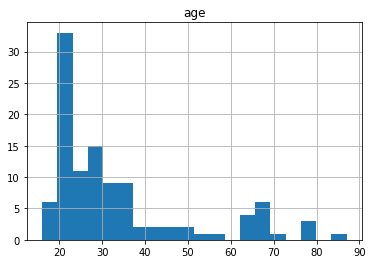

In [16]:
kino.hist(column='age', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faea7369b10>,
      dtype=object)

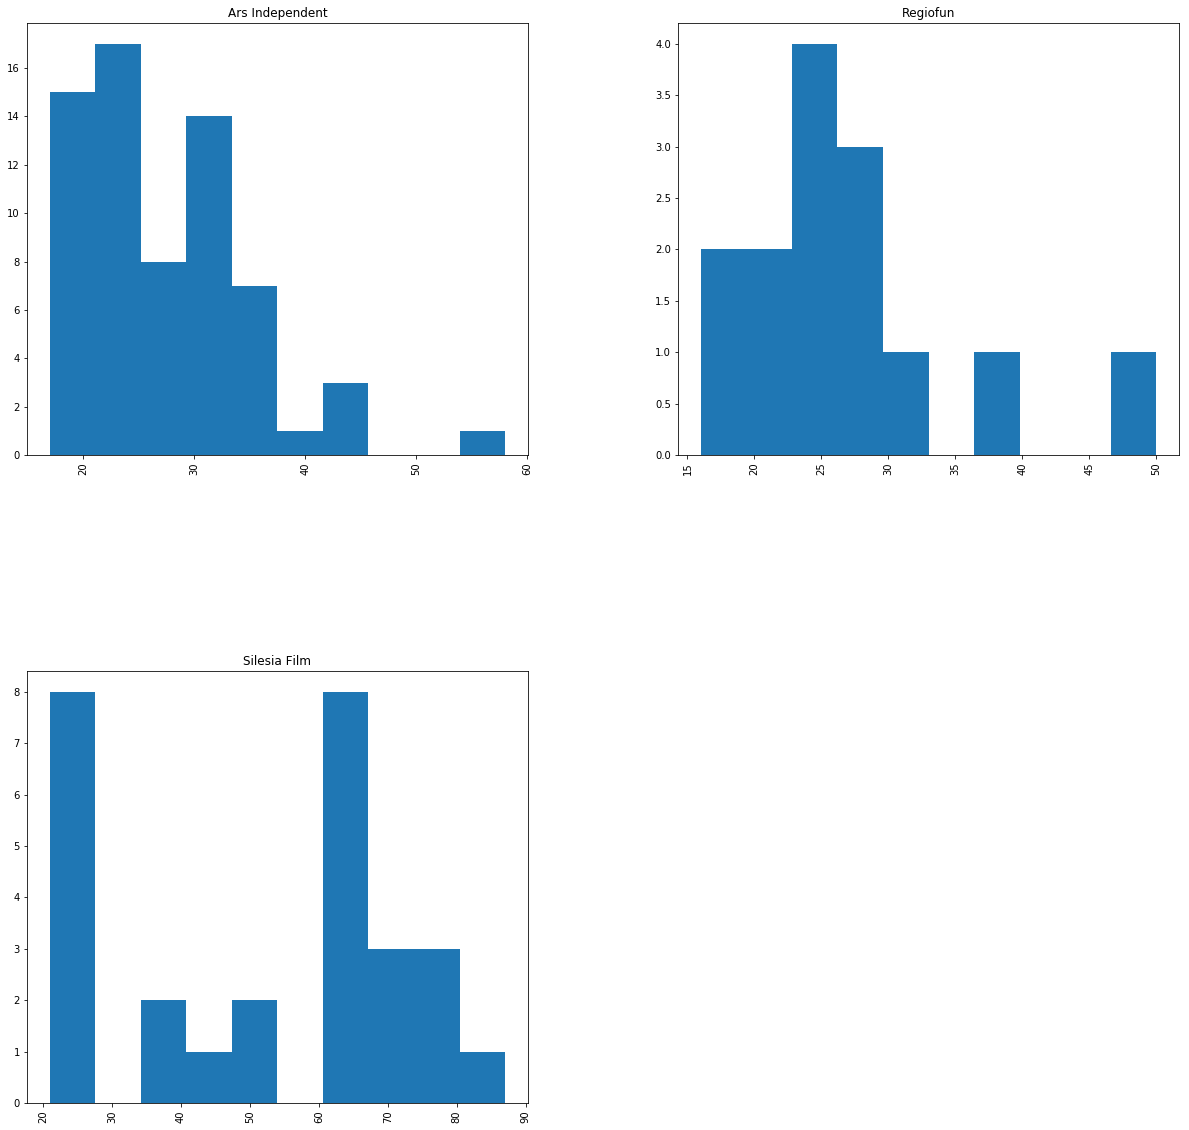

In [17]:
kino.hist(column='age', by='event', bins=10, figsize=(20, 20), xlabelsize=10, ylabelsize=10)

In [18]:
(
    kino
    .groupby('event')
    .sum()[[
        'facebook',
        'with_friends', 'with_children', 'with_alone',
        'with_partner', 'with_guests', 'with_custom',
    ]]
    .sort_values('facebook', ascending=False)
)

,facebook,with_friends,with_children,with_alone,with_partner,with_guests,with_custom
event,,,,,,,
Silesia Film,13.0,11.0,2.0,13.0,4.0,0.0,3.0
Regiofun,11.0,8.0,0.0,2.0,3.0,0.0,1.0
Ars Independent,0.0,31.0,1.0,18.0,29.0,3.0,3.0


In [19]:
(
    kino
    .groupby('event')
    .agg(['count', 'min', 'max', 'mean', 'sum'])
    [ [ 'spendings'] ]
)

spendings                                
                    count   min    max       mean     sum
event                                                    
Ars Independent        57   0.0  600.0  59.789474  3408.0
Regiofun               12   0.0  300.0  71.250000   855.0
Silesia Film           21  10.0  200.0  43.095238   905.0

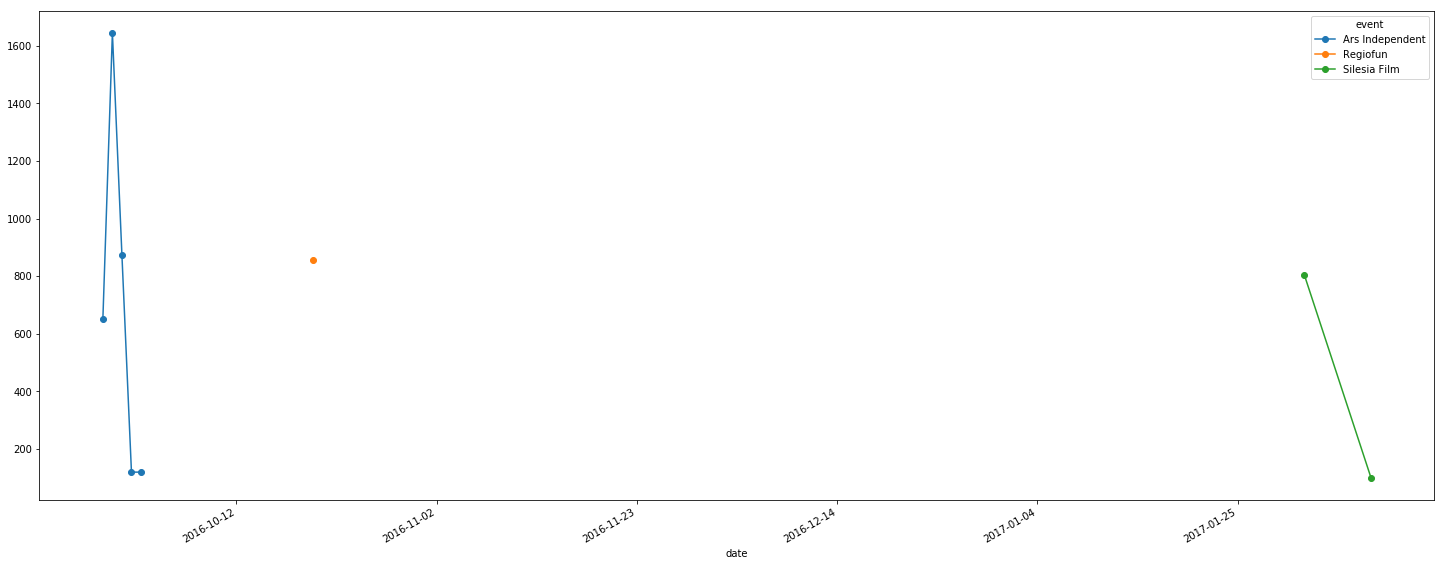

In [20]:
(
    kino
    .groupby(['date', 'event'])
    .sum()['spendings']
    .unstack()
    .plot(figsize=(25, 10), style='o-')
)

In [21]:
# bardzo trudne i moze nie zdaze wytlumaczyc 
# wczytuje kolejny plik (tym razem JSON) z kordynacjami - wyniki operacji na geo.ipynb
import json
with open('geo.json') as fp:
    map_cities = json.load(fp)
    
def get_val_from_row(attr, city):
    if not isinstance(city, str):
        return float('nan')
    city = city.partition(',')[0]
    obj = map_cities.get(city.decode('utf-8'))
    if obj is None:
        return float('nan')
    return obj[attr]

def get_series(attr, frame):
    keys = frame.groups.keys()
    return pd.Series(
        (get_val_from_row(attr, row) for row in keys),
        index=keys,
    )
    
cities = fm.groupby(['address_city'])

dane = pd.DataFrame(
    {
        'kasa': cities.sum()['spendings'],
        'lat': get_series('lat', cities),
        'lon': get_series('lon', cities),
    },
    index=cities.groups.keys(),
    columns=['kasa', 'lon', 'lat']
)

dane

,kasa,lon,lat
Czaszyn,500.0,22.2172988,49.4497255
Koszęcin,30.0,18.8413347,50.635918
Konin,365.0,18.2521112,52.2301933
Szczecin,2760.0,14.5509623,53.4301818
Zbrosławice,150.0,18.7522,50.41557
Paris,0.0,2.3514992,48.8566101
Oslo,2000.0,10.7389701,59.9133301
"Bisceglie, Italy",1200.0,16.5010109,41.2402745
Gorzyce,50.0,17.7438889,52.0227778
Jastrzębie-Zdrój,920.0,18.6023614,49.9519085


In [74]:
from ipyleaflet import Map, basemaps, GeoJSON, Circle
from math import isnan

polska = Map(center=(50, 19), zoom=8, basemap=basemaps.Hydda.Full)


for index, row in dane.iterrows():
    lon = float(row.lon)
    lat = float(row.lat)
    if isnan(lon) or isnan(lat):
        continue
        
    circle = Circle()
    circle.location = (lat, lon)
    circle.radius = int(row.kasa / 20.0)
    circle.color = "red"
    circle.fill_color = "red"

    polska.add_layer(circle)
polska

TWFwKGJhc2VtYXA9eyd1cmwnOiAnaHR0cDovL3tzfS50aWxlLm9wZW5zdHJlZXRtYXAuc2UvaHlkZGEvZnVsbC97en0ve3h9L3t5fS5wbmcnLCAnYXR0cmlidXRpb24nOiAnVGlsZXMgY291cnTigKY=
